# Body Fat Prediction

<b>QUESTION</b>: How to predict body fat with the dataset of given measurements of certain body parts, age and weight? 

<b>Short Summary</b>: Lists estimates of the percentage of body fat determined by underwater weighing and various body circumference measurements for 252 men.

<b>Classroom use of this data set</b>: This data set can be used to illustrate multiple regression techniques. Accurate measurement of body fat is inconvenient/costly and it is desirable to have easy methods of estimating body fat that are not inconvenient/costly.

Source: https://www.openml.org/search?type=data&status=active&id=560&sort=runs

<b>GOAL FOR THIS PROJECT</b>: Compare and evaluate the three models used to predict body fat using the given data.

In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

%matplotlib inline
import warnings # supress warnings
warnings.filterwarnings('ignore')

In [191]:
#Loading the dataframe
df = pd.read_csv('bodyfat.csv')

# <b><u>Exploring Data (EDA)

In [192]:
#Checking the dataframe
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [193]:
#Checking the number of rows, number of columns, and what the features are
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [194]:
#Check for missing values(null values):
pd.isnull(df).sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [195]:
#Checking the data types of each feature:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [196]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))


#The code(below)is saved for another EDA purpose(please ignore)    
#for col in df.columns:
  #df[col].replace({'?':np.nan},inplace=True)

Density : [1.0708 1.0853 1.0414 1.0751 1.034  1.0502 1.0549 1.0704 1.09   1.0722
 1.083  1.0812 1.0513 1.0505 1.0484 1.0512 1.0333 1.0468 1.0622 1.061
 1.0551 1.064  1.0631 1.0584 1.0668 1.0911 1.0811 1.091  1.079  1.0716
 1.0862 1.0719 1.0263 1.0101 1.0438 1.0346 1.0202 1.0258 1.0217 1.025
 1.0279 1.0269 1.0814 1.067  1.0742 1.0665 1.0678 1.0903 1.0756 1.084
 1.0807 1.0848 1.0906 1.0473 1.0524 1.0356 1.028  1.043  1.0396 1.0317
 1.0298 1.0403 1.0264 1.0313 1.0499 1.0673 1.0847 1.0693 1.0439 1.0788
 1.0796 1.068  1.072  1.0666 1.0483 1.0498 1.056  1.0283 1.0382 1.0568
 1.0377 1.0378 1.0386 1.0648 1.0462 1.08   1.052  1.0573 1.0795 1.0424
 1.0785 1.0991 1.077  1.073  1.0582 1.0506 1.053  1.048  1.0412 1.0578
 1.0547 1.0569 1.0593 1.05   1.0538 1.0355 1.0486 1.0503 1.0384 1.0607
 1.0529 1.0671 1.0404 1.0575 1.0358 1.0652 1.0623 1.0674 1.0587 1.0373
 1.059  1.0515 1.0472 1.0452 1.0398 1.0435 1.0374 1.0491 1.0325 1.0481
 1.0522 1.0422 1.0571 1.0459 1.0775 1.0754 1.0664 1.055  1.0322 1.0873

# <b><u>Feature Selection

<b>SELECTING THE OUTCOME/RESPONSE VARIABLE(TARGET VARIABLE, VARIABLE TO PREDICT) AND FEATURES

In [197]:
#Selected variable to predict.
df['BodyFat'] #target variable

#Checking what the features are
df.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

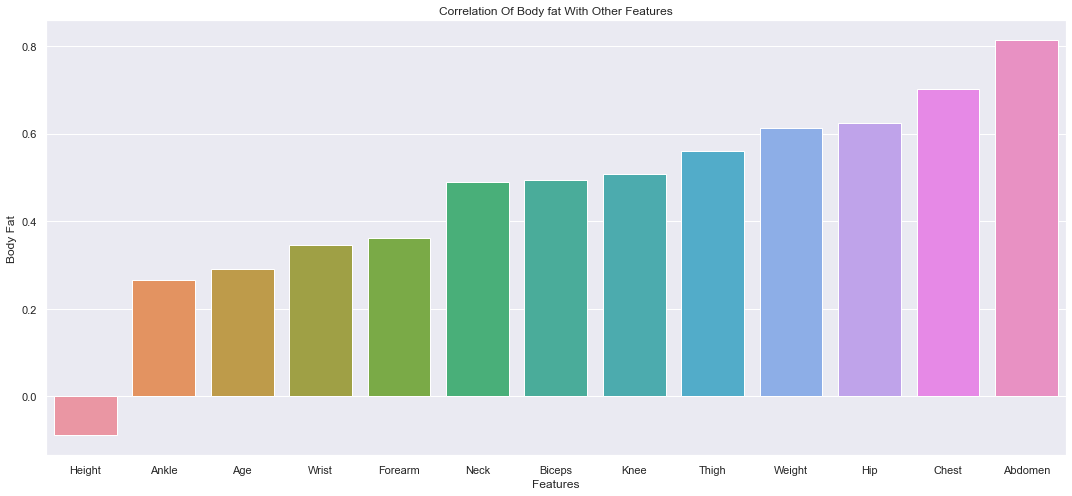

In [198]:
#Inspecting correlation of features with target variable ('BodyFat')
plt.figure(figsize=(15,7))
sns.barplot(y=df.corr()['BodyFat'][2:].values, x=df.corr()['BodyFat'][2:].index, order=df.corr()['BodyFat'][2:].sort_values().index)
plt.xlabel("Features")
plt.ylabel("Body Fat")
plt.title('Correlation Of Body fat With Other Features')
plt.show()

In [199]:
#Defining features for dependent variables
features = ['Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist']

Text(0.5, 1.0, 'Pearson Correlation')

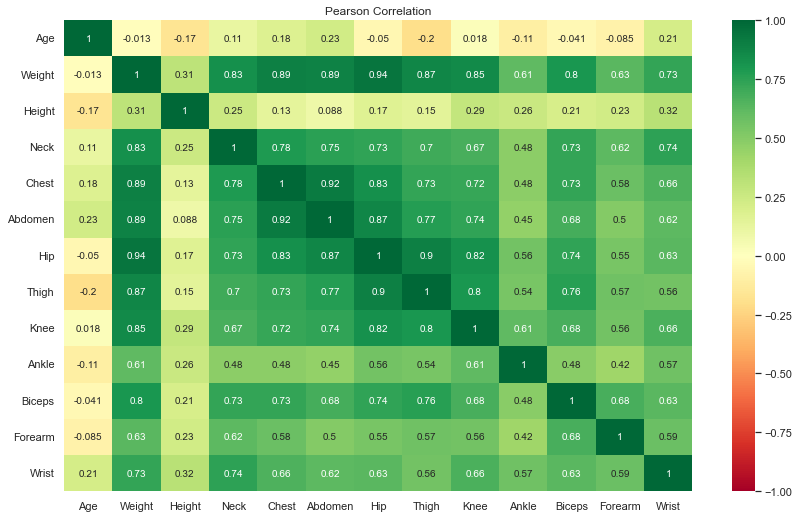

In [200]:
#Checking correlations. Visualising while checking correlations
#sns.pairplot(df)

corr_pearson = df[features].corr(method='pearson')

plt.figure(figsize=(12,14))
ax1 = plt.subplot(2,1,1)
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')

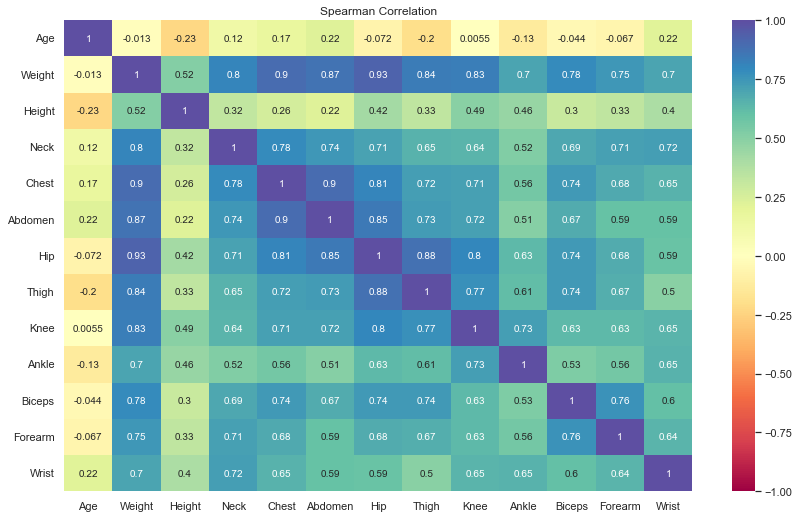

In [201]:
corr_spearman = df[features].corr(method='spearman')

plt.figure(figsize=(12,14))
ax2 = plt.subplot(2,1,2, sharex=ax1)
sns.heatmap(corr_spearman, annot=True, cmap='Spectral', vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

<b>Adding new features in the dataframe: Calculating body mass index after converting height and weight in metric units, and adding the features to the dataframe.

In [202]:
# add height and weight in metric units as features
df['Height_m'] = df.Height*2.54/100
df['Weight_kg'] = df.Weight*0.454

# add BMI as feature
df['BMI'] = df.Weight_kg / (df.Height_m**2) #Formula for calculating BMI
features = features + ['BMI']

In [203]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Height_m,Weight_kg,BMI
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,1.72085,70.0295,23.648031
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,1.83515,78.6555,23.355327
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,1.68275,69.9160,24.690926
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,1.83515,83.8765,24.905609
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,1.80975,83.6495,25.540311


In [204]:
#Defining features again for dependent variables with 'Weight', 'Height', being replaced by 'Height_m','Weight_kg' and 'BMI'.
features = ['BMI','Age', 'Weight_kg', 'Height_m', 'Neck', 'Chest','Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']

In [205]:
df[features].head()

,BMI,Age,Weight_kg,Height_m,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,23.648031,23,70.0295,1.72085,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,23.355327,22,78.6555,1.83515,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,24.690926,22,69.9160,1.68275,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,24.905609,26,83.8765,1.83515,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,25.540311,24,83.6495,1.80975,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [206]:
df[features].columns

Index(['BMI', 'Age', 'Weight_kg', 'Height_m', 'Neck', 'Chest', 'Abdomen',
       'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype='object')

In [207]:
#Selecting the outcome/response variable(target variable, variable to predict) and features
#Selected features(below)
X = df[features] 

#Selected target variable (below)
y = df['BodyFat']

# <B><U>Model Selection

<b><u>LINEAR REGRESSION 

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [209]:
logs = []
lr_model = LinearRegression()

In [210]:
lr_model.fit(X_train,y_train)

LinearRegression()

<b>Predict variable(Body Fat) of X_test.

In [211]:
#Predicted variable(Body Fat) = bf_pred
bf_pred = lr_model.predict(X_test)

In [212]:
bf_pred #Result of predicted variable(Body Fat)

array([16.31302913, 15.95241743, 33.77921643, 16.27314369, 16.61224441,
       16.92134825, 18.05740048, 23.8203574 ,  9.88707109, 15.33782783,
       25.78931072, 24.28479268, 19.13922928, 18.76607434,  8.23917415,
        5.4162182 , 16.97498176, 23.58199384, 20.15729159,  6.85702561,
       18.38884068, 23.06915246, 14.915422  , 15.14115004, 22.84288782,
       27.98792609, 27.9967521 , 18.80388317,  7.7729228 , 16.05798796,
       20.71223076, 15.96783041, 20.47189163, 23.63907047, 21.50606336,
        7.31997338, 21.31014978, 15.89074324, 17.54563589, 15.76313093,
       16.65479318, 25.01968742, 29.24499536,  4.43153749,  9.3995557 ,
       20.16066449, 22.72532071, 15.35106135, 19.27641396, 10.48434322,
       47.00097046, 16.25949342, 23.82638426, 35.69520064, 11.33905582,
       23.192276  ,  8.05202696, 22.14253575, 26.31489007, 39.3149647 ,
       11.42326506, 21.01333937, 16.51523623,  8.52052786, 25.89845727,
       15.762627  , 14.2497104 ,  4.07056615, 22.01499099, 10.99

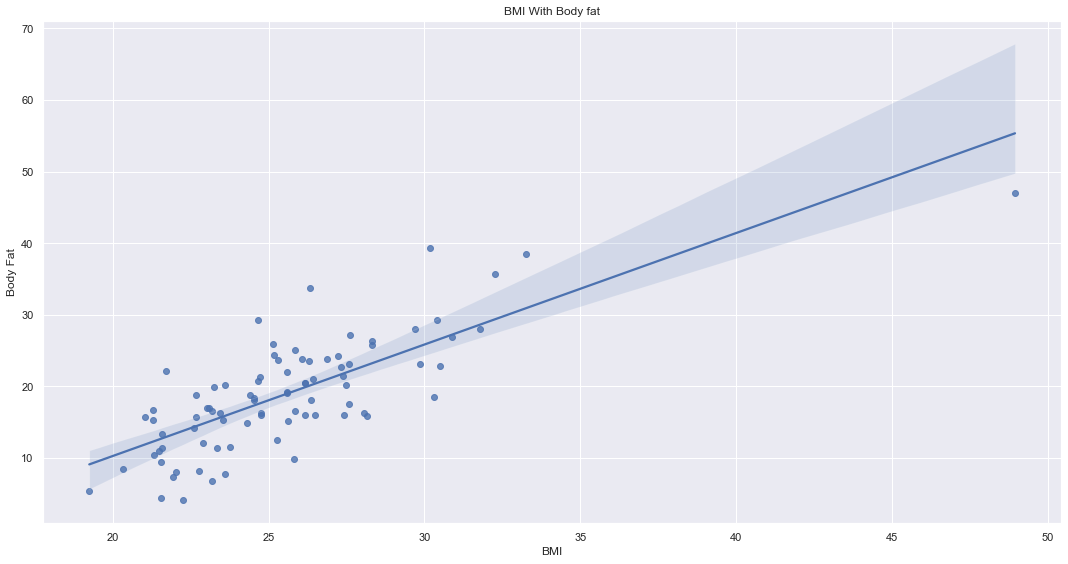

In [213]:
#Plotting Predictions of BMI with Body Fat
sns.set_style("ticks",{'axes.grid' : True})
sns.set(rc = {'figure.figsize':(15,8)})
sns.regplot(x= X_test['BMI'], y= bf_pred)
plt.xlabel("BMI")
plt.ylabel("Body Fat")
plt.title('BMI With Body fat')
plt.show()

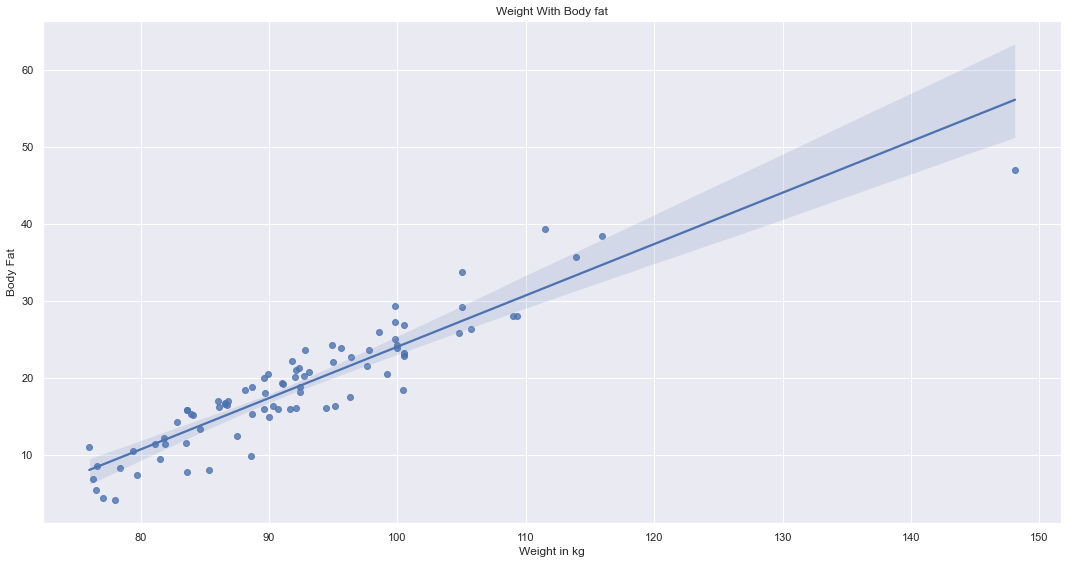

In [214]:
#Plotting Predictions of Body Fat vs. Weight in kg 
sns.set_style("ticks",{'axes.grid' : True})
sns.set(rc = {'figure.figsize':(15,8)})
sns.regplot(x= X_test['Abdomen'], y= bf_pred)
plt.xlabel("Weight in kg")
plt.ylabel("Body Fat")
plt.title('Weight With Body fat')
plt.show()

In [215]:
#Coefficients
lr_model.coef_

array([ 0.0245387 ,  0.06676437, -0.31082305, -0.07234484, -0.28127706,
       -0.04474412,  1.08640607, -0.21370945,  0.29367798, -0.0560824 ,
        0.24817873,  0.23121597,  0.14433528, -1.23219387])

<b>Evaluate the model on test set.

In [216]:
lr_score = lr_model.score(X_test, y_test)
lr_score

0.6364642981970933

In [217]:
lr_rmse = mean_squared_error(y_test, bf_pred, squared=False)
lr_rmse

4.44468260081312

In [218]:
log = {"name": "linear_regression", "score": lr_score, "rmse": lr_rmse}
logs.append(log)

***

<b><u>CROSS-VALIDATION 

In [219]:
from sklearn.model_selection import cross_val_predict

#Cross validating the prediction of Body Fat(bf_pred) using the model
predicted = cross_val_predict(lr_model, X_test, y_test, cv=3)

In [220]:
predicted

array([19.97711828, 14.7970352 , 29.06185052, 16.17735211, 16.52106261,
       17.87993739, 16.94934189, 19.59735015,  9.93242224, 17.75714586,
       22.4831811 , 22.37126979, 17.4385166 , 16.94442556, 12.373502  ,
        5.63597898, 16.8076119 , 21.64795376, 21.05402312, 10.7586939 ,
       16.4834773 , 23.50478141, 13.30063509, 18.29374032, 25.00543579,
       26.16369609, 22.6947337 , 17.5054048 , 12.07070611, 14.21403138,
       19.177979  , 19.81016123, 21.766028  , 24.43146862, 20.82894765,
       12.46758224, 22.86843415, 17.16547797, 15.22485089, 15.52186733,
       17.53614068, 27.20843009, 30.22869529, 11.10171484, 12.65124229,
       22.38629334, 23.61582575, 18.18560201, 16.43688255, 11.39002582,
       39.21979857, 20.7224806 , 25.37038269, 32.36477207, 12.4893634 ,
       19.15857889, 10.62672258, 16.28393574, 23.51684651, 36.7287015 ,
       11.1873437 , 22.75897452, 18.98081572,  9.76783923, 20.42834958,
       12.17815319, 17.61053325,  6.95316597, 18.64127185,  9.50

In [221]:
lr_CV = cross_val_score(lr_model, X_train, y_train, cv=10)

print(f"CV Score --> {np.mean(lr_CV)}")

CV Score --> -5.376096333784587


***

<b><u>LASSO

In [222]:
#from sklearn.linear_model import Lasso
lassomod=Lasso(alpha=0.5)
lassomod.fit(X_train,y_train)

Lasso(alpha=0.5)

In [223]:
l_pred = lassomod.predict(X_test)


In [224]:
l_pred

array([15.82637005, 16.2131875 , 31.82470191, 16.46224431, 16.09577596,
       16.37843934, 17.84698067, 23.89811879, 11.45939174, 13.86784323,
       26.28814082, 24.27933765, 19.44671734, 18.79584383,  8.66126038,
        6.74802097, 16.15957597, 22.53295893, 19.36248471,  6.83368116,
       18.96067806, 22.21341625, 16.29710695, 14.04362253, 21.72044576,
       27.78346733, 28.13965388, 18.64890642,  8.19473384, 17.94391839,
       19.73620012, 16.35862673, 19.10543891, 23.23107403, 21.75179509,
        8.1069217 , 20.43722818, 15.86473313, 18.5598206 , 15.02164898,
       17.04347194, 23.83875528, 28.28018051,  5.55620919, 10.15248498,
       18.69322218, 20.78963433, 14.7202541 , 19.52998133, 10.08380066,
       47.81000301, 14.57275005, 23.64308132, 33.96718531, 12.04130132,
       23.10404144,  9.15313521, 22.74317265, 25.33054909, 38.20108192,
       11.89690472, 19.18912635, 16.61114493,  8.11809811, 26.79916569,
       16.99697321, 14.17968532,  5.76105152, 22.42766297, 10.91

In [225]:
lcv_score = cross_val_score(lassomod, X_train, y_train, cv=10)
print(f"CV Score --> {np.mean(lcv_score)}")

lrmse = mean_squared_error(y_test, l_pred, squared=False)
print(f"RMSE --> {lrmse}")

CV Score --> 0.6960473238080239
RMSE --> 4.574771310984868


In [226]:
log = {"name": "lasso", "score": np.mean(lcv_score), "rmse": lrmse}

In [227]:
logs.append(log)

In [228]:
lassomod.coef_

array([ 0.03209107,  0.03497116, -0.37481164, -0.        , -0.07622003,
       -0.        ,  1.0195161 , -0.03897699,  0.16321107, -0.        ,
        0.        ,  0.06874291,  0.        , -0.        ])

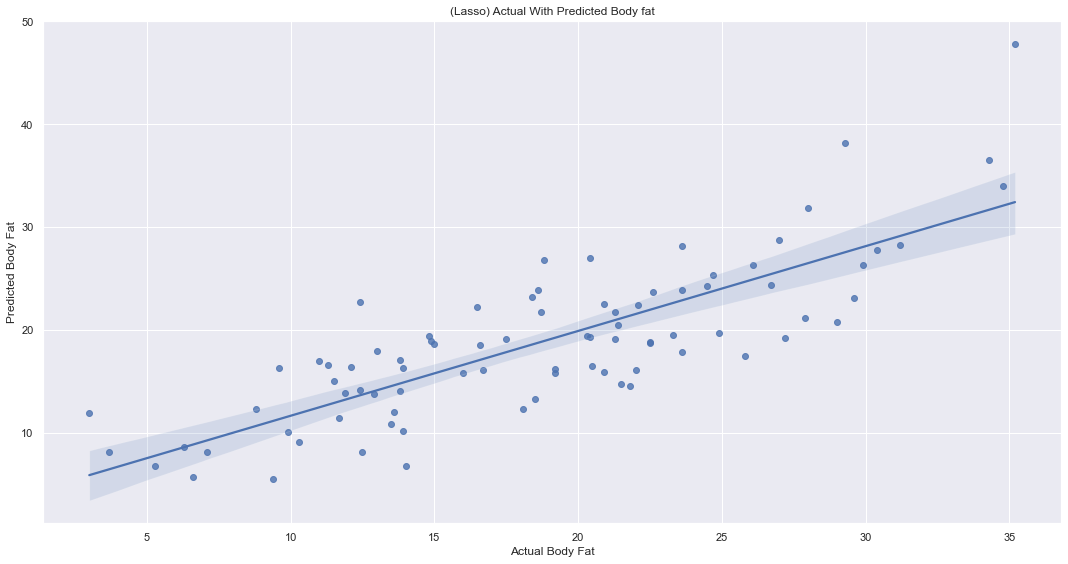

In [229]:
sns.set_style("ticks",{'axes.grid' : True})
sns.set(rc = {'figure.figsize':(15,8)})
sns.regplot(x=y_test, y=l_pred)

plt.xlabel("Actual Body Fat")
plt.ylabel("Predicted Body Fat")
plt.title('(Lasso) Actual With Predicted Body fat')
plt.show()

***

<b><u> RIDGE

In [230]:
#from sklearn.linear_model import Ridge
ridgemod=Ridge(alpha=0.5)
ridgemod.fit(X_train,y_train)

Ridge(alpha=0.5)

In [231]:
r_pred = ridgemod.predict(X_test)

In [232]:
r_pred

array([16.30870764, 15.95098902, 33.7738887 , 16.26883744, 16.61034913,
       16.91792695, 18.06474597, 23.82231457,  9.88847485, 15.32265626,
       25.79901189, 24.2928201 , 19.14705692, 18.76983078,  8.23811525,
        5.41873953, 16.97150595, 23.57661141, 20.14668657,  6.86013138,
       18.39888587, 23.05968883, 14.92556439, 15.13808286, 22.83035547,
       27.97994409, 28.00469794, 18.79572477,  7.77311677, 16.07578766,
       20.69355891, 15.96982456, 20.46959091, 23.64168995, 21.50328989,
        7.32114914, 21.30753625, 15.89705518, 17.55330935, 15.76089218,
       16.67215611, 25.01352145, 29.25020921,  4.44343552,  9.40954335,
       20.15386667, 22.70622483, 15.34891382, 19.2772885 , 10.47861347,
       46.97202246, 16.24871984, 23.82757611, 35.67388872, 11.34586928,
       23.18885812,  8.05610879, 22.15862606, 26.30002158, 39.31218906,
       11.42396635, 20.99761983, 16.51694115,  8.5095439 , 25.90959128,
       15.77769083, 14.2550212 ,  4.07504423, 22.0330239 , 10.99

In [233]:
rcv_score = cross_val_score(ridgemod, X_train, y_train, cv=3)
print(f"CV Score --> {np.mean(rcv_score)}")

rrmse = mean_squared_error(y_test, r_pred, squared=False)
print(f"RMSE --> {rrmse}")

CV Score --> 0.7016577122648783
RMSE --> 4.445377369142432


In [234]:
print(rcv_score)

[0.69890297 0.74335372 0.66271645]


In [235]:
log = {"name": "ridge", "score": np.mean(rcv_score), "rmse": rrmse}

In [236]:
logs.append(log)

In [237]:
ridgemod.coef_

array([ 0.02505331,  0.06655432, -0.31217428, -0.01907692, -0.28229441,
       -0.04423691,  1.08661856, -0.21348468,  0.29433006, -0.05687091,
        0.24634969,  0.23109777,  0.14339618, -1.21750394])

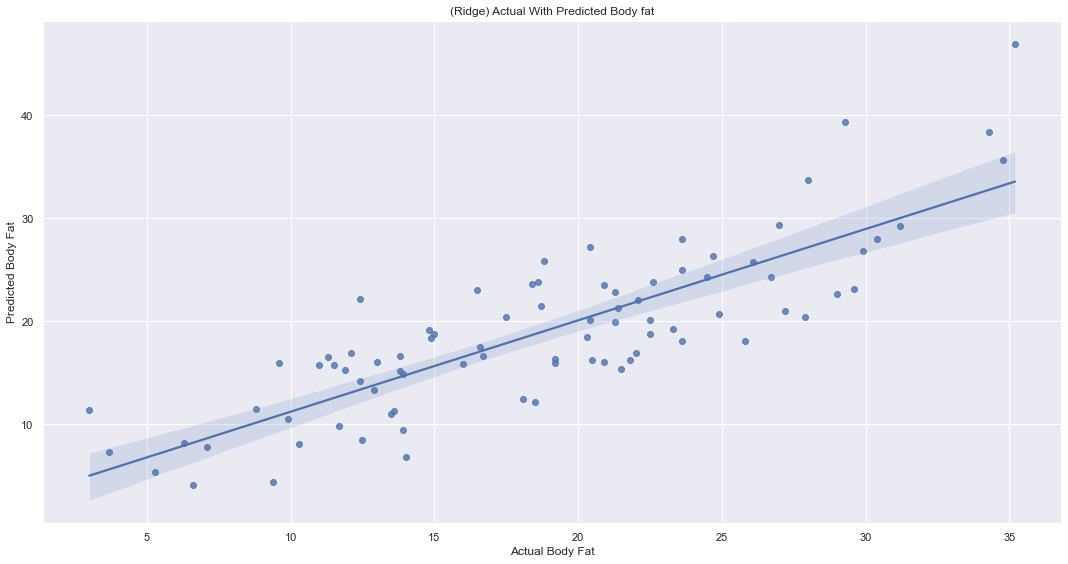

In [238]:
sns.set_style("ticks",{'axes.grid' : True})
sns.set(rc = {'figure.figsize':(15,8)})
sns.regplot(x=y_test, y= r_pred)

plt.xlabel("Actual Body Fat")
plt.ylabel("Predicted Body Fat")
plt.title('(Ridge) Actual With Predicted Body fat')
plt.show()

 ***

# <B><U>Evaluation

<B>Compare results of ridge and lasso.

In [239]:
models=[lr_model,lassomod,ridgemod]
name=["LINEAR REGRESSION","LASSO","RIDGE"]

for i,model in enumerate(models):
    ac=model.score(X_test,y_test)
    print(f"model => {name[i]}")
    print('score:', ac)

model => LINEAR REGRESSION
score: 0.6364642981970933
model => LASSO
score: 0.614872668989499
model => RIDGE
score: 0.6363506375129496


# <B><U>Conclusion

In [240]:
logs

[{'name': 'linear_regression',
  'score': 0.6364642981970933,
  'rmse': 4.44468260081312},
 {'name': 'lasso', 'score': 0.6960473238080239, 'rmse': 4.574771310984868},
 {'name': 'ridge', 'score': 0.7016577122648783, 'rmse': 4.445377369142432}]

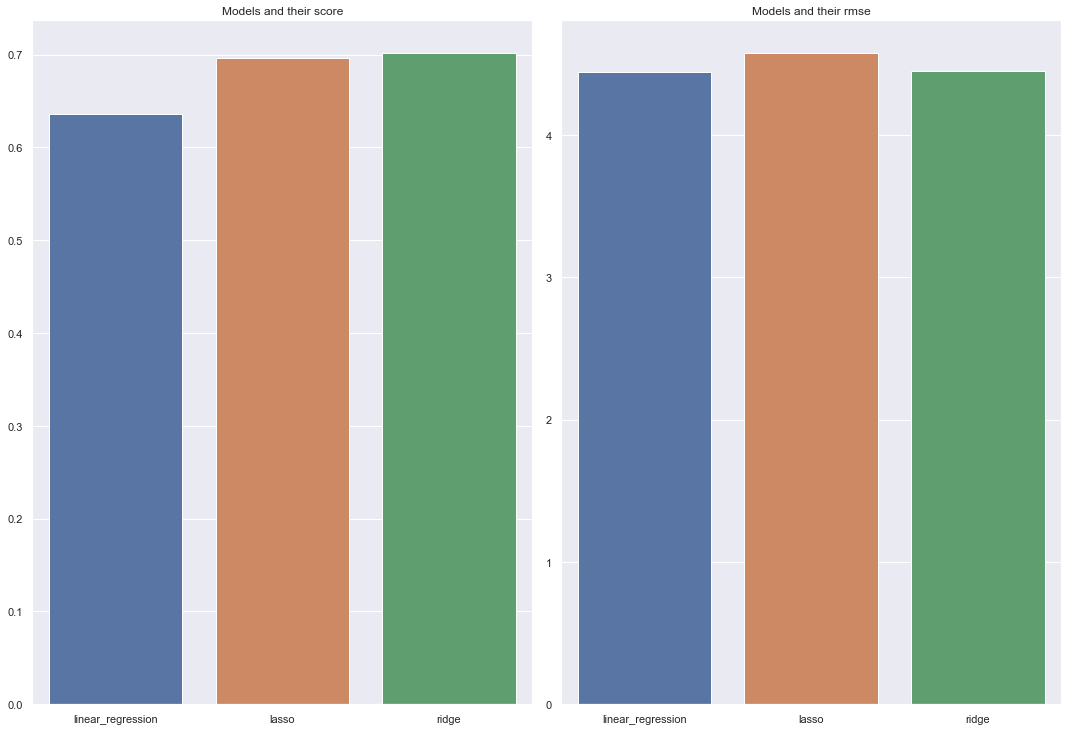

In [241]:
x = []
y = []
z = []
for log in logs:
    x.append(log['name'])
    y.append(log['score'])
    z.append(log['rmse'])
    
# sns.barplot(x,y)
# sns.barplot(x,z)

plt.figure(figsize=(15,20))
plt.subplot(2,2,1)
sns.barplot(x,y)
plt.title("Models and their score")

plt.subplot(2,2,2)
sns.barplot(x,z)
plt.title("Models and their rmse")

plt.show()

In [242]:
print('LINEAR REGRESSION: score: 0.6364642981970933 | CV score: 0.6364642981970933 | rmse: 4.44468260081312')
print('LASSO: score: 0.614872668989499 | CV score: 0.6960473238080239 | rmse: 4.574771310984868')
print('RIDGE: score: 0.6363506375129496 | CV score: 0.7016577122648783 | rmse: 4.445377369142432')

LINEAR REGRESSION: score: 0.6364642981970933 | CV score: 0.6364642981970933 | rmse: 4.44468260081312
LASSO: score: 0.614872668989499 | CV score: 0.6960473238080239 | rmse: 4.574771310984868
RIDGE: score: 0.6363506375129496 | CV score: 0.7016577122648783 | rmse: 4.445377369142432


# <b><u>CONCLUSION:</b></u>

In terms of score, RIDGE REGRESSION has the highest score of the three models used in this project, therefore RIDGE REGRESSION is the potential model to predict body fat percentage.

***

<b>reference:

https://www.openml.org/search?type=data&status=active&id=560&sort=runs
https://towardsdatascience.com/parameters-and-hyperparameters-aa609601a9ac
https://www.ibm.com/topics/linear-regression
https://www.statisticshowto.com/lasso-regression/
https://en.wikipedia.org/wiki/Ridge_regression
https://medium.com/swlh/predictive-modelling-using-linear-regression
https://epurdom.github.io/Stat131A/lectures/2019FallLectures/05MultipleRegression_forClass.pdf
https://www.kaggle.com/code/swetash/baseline-bodyfat-prediction-ridge-lasso-70-acc
https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset

Bailey, Covert (1994). Smart Exercise: Burning Fat, Getting Fit, Houghton-Mifflin Co., Boston, pp. 179-186.
Behnke, A.R. and Wilmore, J.H. (1974). Evaluation and Regulation of Body Build and Composition, Prentice-Hall, Englewood Cliffs, N.J.
Siri, W.E. (1956), "Gross composition of the body", in Advances in Biological and Medical Physics, vol. IV, edited by J.H. Lawrence and C.A. Tobias, Academic Press, Inc., New York.
Katch, Frank and McArdle, William (1977). Nutrition, Weight Control, and Exercise, Houghton Mifflin Co., Boston.
Wilmore, Jack (1976). Athletic Training and Physical Fitness: Physiological Principles of the Conditioning Process, Allyn and Bacon, Inc., Boston.
